In [967]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.signal as sig

## Question 1 a)

### Discussion of Question 

A saw tooth function is created. The saw tooth signal has unity amplitude and a period of 1s. The function has two inputs the length of the signal and the number of samples per second. 

The fft function from scipy is used to perform a Fast Fourier Transform (FFT). The function computes the the one-dimensional *n*-point discrete Fourier Transform (DFT) with the efficient FFT algorithm. The FFT refers to a way the (DFT) can be calculated efficiently, by using symmetries in the calculated terms. The symmetry is highest when "n" is a power of 2, and the transform is therefore most efficient for these sizes. The Nyquist frequency is double the highest frequency of the signal, which should be the sampling frequency. The Nyquist frequency is the largest bandwidth that can be sampled without aliasing. 


### Discussion of Result

Since the period of the signal is 1s, the frequency of the signal is 1 Hz and the Nyquist frequency should be 2Hz. This results below show how a sampling rate of 2Hz can detect the actualy frequency of 1Hz, however at least two seconds of siganl would need to be sampled in order to detect the signal frequency. 

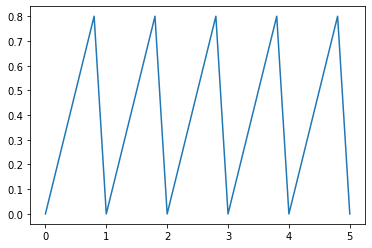

In [667]:
def saw_tooth(time,fs):
    t = np.linspace(0, 1, fs+1)
    time_list = np.linspace(0, 1, fs+1)
    signal = sig.sawtooth(2 * np.pi * t)/2
    for i in np.arange(1,time,1):
        signal = np.concatenate([signal, sig.sawtooth(2 * np.pi * t)/2])
        time_list = np.concatenate([time_list, np.linspace(i, i+1, fs+1)])  
    
    return time_list,signal+0.5

time = 5
fs = 5 # sampling frequency
plt.plot(saw_tooth(time,fs)[0],saw_tooth(time,fs)[1])
plt.show()

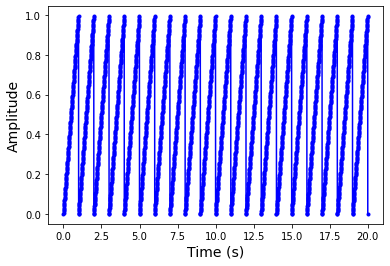

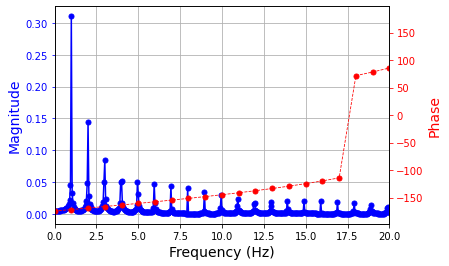

In [668]:
from scipy.fft import fft, fftfreq, ifft,fftshift
# Number of sample points
fs = 160 # Minimum of 2 Hz since Nyquist is 2Hz
time = 20 # Minimum of 2s
N = time*fs 
# sample spacing
T = 1.0 / fs
x = saw_tooth(time,fs)[0]
y = saw_tooth(time,fs)[1]

# The sampling frequency 
plt.plot(x,y,'b.-')
plt.xlabel('Time (s)',size=14)
plt.ylabel('Amplitude',size=14)
plt.show()

yf = fft(y,N)
xf = fftfreq(N, T)[:N//2]
y = 2.0/N * np.abs(yf[0:N//2])


fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.plot(xf[1:],y[1:],'b.-', markersize=10)
ax.tick_params(axis='y', colors='blue')

ax2.plot(np.angle(yf[1:N//2][1:], deg=True),'r.--', markersize=10, linewidth=0.8)
ax2.set_ylabel('Phase',color='r',size=14)
ax2.tick_params(axis='y', colors='red')

ax.grid()
ax.set_xlabel('Frequency (Hz)',size=14)
ax.set_ylabel('Magnitude',color='blue',size=14)
ax.set_xlim(0,20)
plt.show()



# plt.semilogy(xf[1:], y[1:])
# plt.grid()
# plt.xlabel('Frequency (Hz)',size=14)
# plt.ylabel('Magnitude',size=14)
# plt.xlim(0,20)
# plt.show()

## Question 1 b)

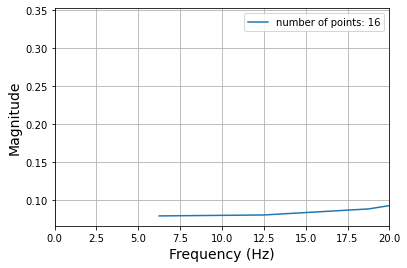

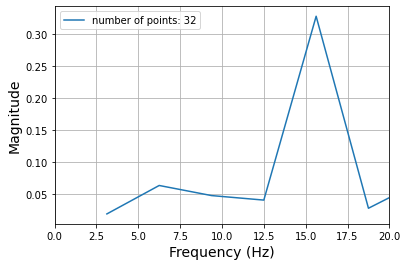

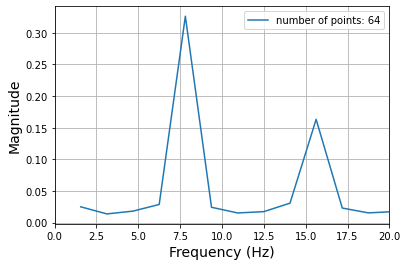

In [991]:
def DFT(x):
    N = len(x) #Number of elements 
    n = np.arange(N) # Frequency 
    k = n.reshape((N, 1)) # iteration of elements 
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X
fs = 100
time = 5
for i in [16,32,64]:
    new_time_series = np.zeros(i)
    for s in range(i):
        new_time_series[s] = saw_tooth(time,fs)[1][int(np.linspace(0,time*fs-1,i)[s])].real #4000 is the first 8 seconds 
    
    X = DFT(new_time_series)

    # calculate the frequency
    # calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N/fs
    freq = n/T 

    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside

    plt.plot(f_oneside[1:], abs(X_oneside)[1:],label='number of points: '+str(i))
    
    plt.xlabel('Freq (Hz)')
    plt.xlim(0, 20)
    plt.grid()
    plt.xlabel('Frequency (Hz)',size=14)
    plt.ylabel('Magnitude',size=14)
    plt.legend()
    plt.show()

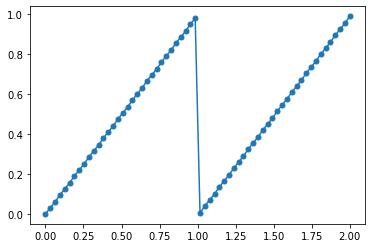

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


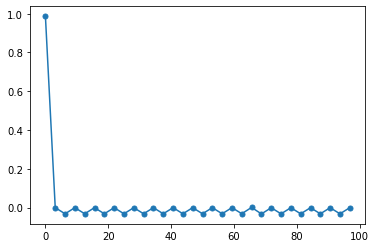

In [703]:
time =2
fs=200
new_time_series2 = saw_tooth(time,fs)[1][np.linspace(0,time*fs-1,64).astype('int')]
plt.plot(np.linspace(0,time,len(new_time_series2)),new_time_series2,'.-',markersize=10);plt.show()

X = DFT(new_time_series2)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.plot(f_oneside,X_oneside,'.-',markersize=10)
#plt.xlim(0,20)
plt.show()

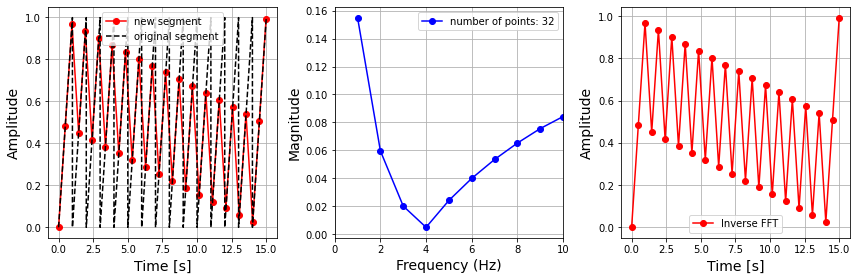

In [1075]:
time = 15
fs =2000
t = np.arange(0,time,1/fs)

segment = 32

new_time_series = np.zeros(segment)
new_time_series_time = np.zeros(segment)
for s in range(segment):
    new_time_series[s] = saw_tooth(time,fs)[1][int(np.linspace(0,time*fs-1,segment)[s])].real #4000 is the first 8 seconds
    new_time_series_time[s] = saw_tooth(time,fs)[0][int(np.linspace(0,time*fs-1,segment)[s])]

X = DFT(new_time_series)
y = new_time_series
yf = fft(y)

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(new_time_series_time,new_time_series, 'ro-',label='new segment')
plt.plot(t,saw_tooth(time,fs)[1][:len(t)], 'k--',label='original segment')
plt.ylabel('Amplitude',size=14)
plt.xlabel('Time [s]',size=14)
plt.grid()
plt.legend()


# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/segment
freq = n/T 

n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside
plt.subplot(1, 3, 2)
plt.plot(f_oneside[1:], abs(X_oneside)[1:],'bo-',label='number of points: '+str(segment))
    
plt.xlim(0, 10)
plt.grid()
plt.xlabel('Frequency (Hz)',size=14)
plt.ylabel('Magnitude',size=14)
plt.legend()


s = ifft(yf)
t = np.linspace(0,time,len(yf))
plt.subplot(1, 3, 3)
plt.plot(t, s.real, 'ro-',label='Inverse FFT')
plt.legend()
plt.grid()
plt.ylabel('Amplitude',size=14)
plt.xlabel('Time [s]',size=14)
plt.tight_layout()
plt.show()

## Question 1 c)

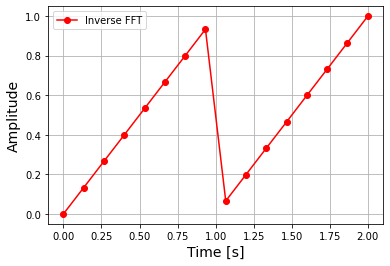

In [1069]:
s = ifft(yf)
t = np.linspace(0,time,len(yf))
plt.plot(t, s.real, 'ro-',label='Inverse FFT')
plt.legend()
plt.grid()
plt.ylabel('Amplitude',size=14)
plt.xlabel('Time [s]',size=14)
plt.show()

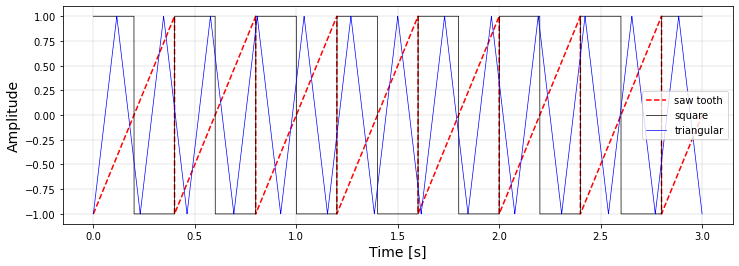

In [1097]:
fs = int(44100)  # 44100 samples per second
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs)

plt.figure(figsize=(12,4))
note1 = sawtooth(1 * np.pi * 5 * t)
note2 = square(1 * np.pi * 5 * t)
note3 = np.concatenate([2*triang(fs)]*int((seconds * fs)/10000))-1
plt.plot(t,note1,'r--',label='saw tooth')
plt.plot(t,note2,'k',label='square',linewidth=0.7)
plt.plot(np.linspace(0, seconds, len(note3)),note3,'b-',label='triangular',linewidth=0.7)
plt.legend()
plt.ylabel('Amplitude',size=14)
plt.xlabel('Time [s]',size=14)
plt.grid(linewidth=0.3)
plt.show()

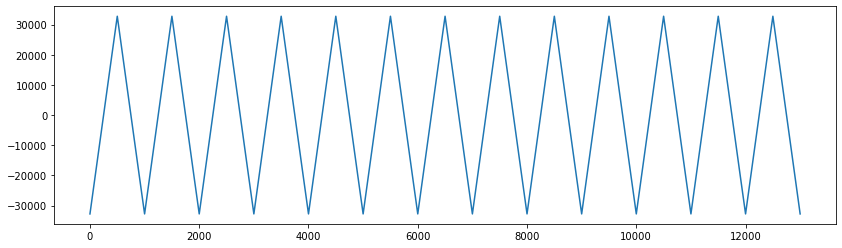

In [1077]:
import numpy as np
import simpleaudio as sa
from scipy.signal import square,sawtooth,triang

fs = int(44100)  # 44100 samples per second
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs)

# Generate a 440 Hz sine wave
# note = np.sin(frequency * t * 2 * np.pi)
#note = sawtooth(1 * np.pi * 5 * t)
#note = square(1 * np.pi * 5 * t)
note = np.concatenate([10*triang(1000)]*int((seconds * fs)/10000))-5

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)
plt.figure(figsize=(14,4))
plt.plot(audio)
plt.show()

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()


## Question 2 

### Discussion of Question

Formula: $L_1 = \frac{1}{2}(D-\Delta T\cdot C)$ 

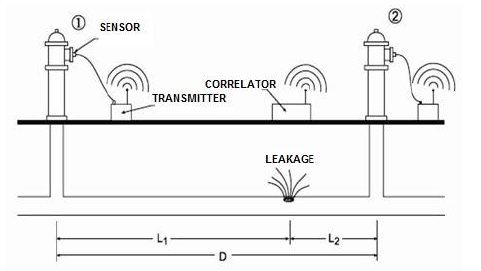

D =  100 m
Time delay = 0mm/s:  L1 =  50.0 m
Time delay = 50mm/s:  L1 =  75.0 m


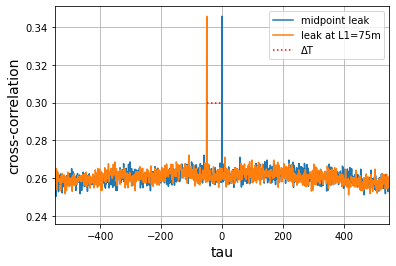

In [964]:
tau = np.arange(-2500,2500) # between the two signals 
full_signal = np.random.rand(10000) ## measurement of pressure signal - the pressure/signal is random 
corr = [] # with no shift 
corr2 = [] # with shift 

D = 100 #m
T = 50 #mm/s
C = 1000 #m/s

for i in tau:
    sig = full_signal[5000:6000] # measurement of a thousand points of the full signal at sensor 1 
    sig2 = full_signal[5000+i:6000+i] # measurement of a thousand points of the full signal at sensor 2  - no shift
    corr.append(np.average(sig*sig2))
    sig3 = full_signal[5000+T+i:6000+T+i] # measurement of a thousand points of the full signal at sensor 2 - shift 
    corr2.append(np.average(sig*sig3))

print('D = ',D,'m')
print('Time delay = 0mm/s:  L1 = ',0.5*(D-(0/1000)*C),'m')
print('Time delay = 50mm/s:  L1 = ',0.5*(D-(-T/1000)*C),'m')
plt.plot(tau,corr,label='midpoint leak')
plt.plot(tau,corr2,label='leak at L1=75m')
plt.plot([-50,0],[0.3,0.3],'r:',label='ΔT')
plt.ylabel('cross-correlation',size=14)
plt.xlabel('tau',size=14)
plt.xlim(-550,550)
plt.legend()
plt.grid()
plt.show()


D =  100 m
Time delay = 0mm/s:  L1 =  50.0 m
Time delay = 50mm/s:  L1 =  75.0 m


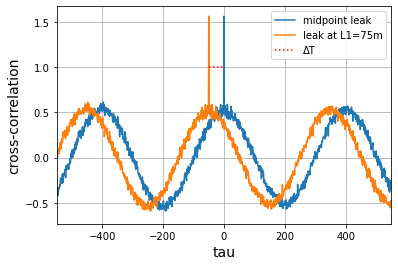

In [1141]:
tau = np.arange(-4000,3000)
t = np.linspace(0,100,10000)
start = np.zeros(5000)
full_signal = np.append(start,np.sin((t*2*np.pi)/4) + np.random.randn(10000))
end = np.zeros(5000)
full_signal = np.append(full_signal,end)
corr = [] # with no shift 
corr2 = [] # with shift 

D = 100 #m
T = 50 #mm/s
C = 1000 #m/s

for i in tau:
    sig = full_signal[11000:12000] # measurement of a thousand points of the full signal at sensor 1 
    sig2 = full_signal[11000+i:12000+i] # measurement of a thousand points of the full signal at sensor 2  - no shift
    corr.append(np.average(sig*sig2))
    sig3 = full_signal[11000+T+i:12000+T+i] # measurement of a thousand points of the full signal at sensor 2 - shift 
    corr2.append(np.average(sig*sig3))

print('D = ',D,'m')
print('Time delay = 0mm/s:  L1 = ',0.5*(D-(0/1000)*C),'m')
print('Time delay = 50mm/s:  L1 = ',0.5*(D-(-T/1000)*C),'m')
plt.plot(tau,corr,label='midpoint leak')
plt.plot(tau,corr2,label='leak at L1=75m')
plt.plot([-50,0],[1,1],'r:',label='ΔT')
plt.ylabel('cross-correlation',size=14)
plt.xlabel('tau',size=14)
plt.xlim(-550,550)
plt.grid()
plt.legend()
plt.show()

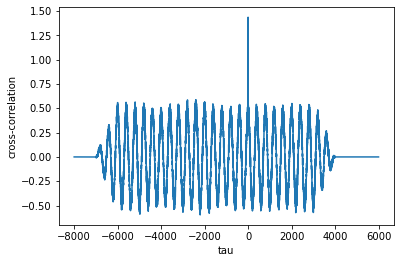

In [527]:
tau = np.arange(-8000,6000)
t = np.linspace(0,100,10000)
start = np.zeros(5000)
full_signal = np.append(start,np.sin((t*2*np.pi)/4) + np.random.randn(10000))
end = np.zeros(5000)
full_signal = np.append(full_signal,end)
corr = []
corr2 = []

for i in tau:
    sig = full_signal[11000:12000]
    sig2 = full_signal[11000+i:12000+i]
    corr.append(np.average(sig*sig2))

plt.plot(tau,corr)
plt.ylabel('cross-correlation')
plt.xlabel('tau')
plt.show()

## Question 3

## Discussion of Question 

Use func to produce signal 

## Discussion of Result 

The disk angular response is very similar to the 

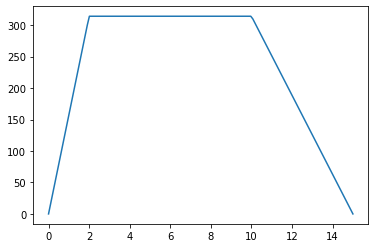

In [241]:
# Angular velocity graph 
def func_d(x):
    y_d = np.zeros(len(x))
    for t,s in zip(x,range(len(x))):
        # Theta_d_dot(t):
        if t >= 0 and t <= 2:
            y_d[s] = 50 * np.pi * t
        elif t > 2 and t <= 10:
            y_d[s] = 100 * np.pi
        elif t > 10 and t <= 15:
            y_d[s] = (-20 * np.pi) * t + 300 * np.pi
    return y_d

plt.plot(time,func_d(time))
plt.show()

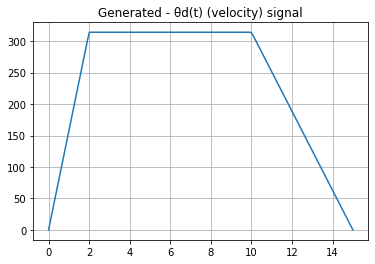

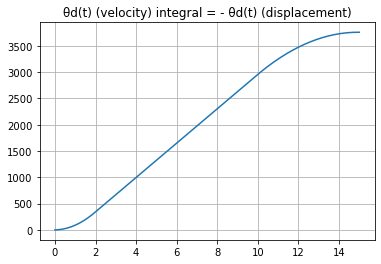

In [837]:
from scipy.integrate import simps
import numpy as np
from matplotlib import pyplot as plt

# Angular velocity graph 
def func(x):
    y = np.zeros(len(x))
    for i,s in zip(x,range(len(x))):
        if i < 2:
            y[s] = 1500*i
        if i >= 2 and i < 10:
            y[s] = 3000
        if i >= 10:
            y[s] = 3000+600*(10-i)
    return y*(2*np.pi/60)


time = np.linspace(0,15,150)


plt.plot(time,func(time))
plt.title('Generated - θd(t) (velocity) signal')
plt.grid()
plt.show()

counter = 0
val = []

for i in range(len(func(time))):
    counter = counter + func(time)[i]
    val.append(counter)
plt.plot(time,np.array(val)*(2*np.pi/60))
plt.title('θd(t) (velocity) integral = - θd(t) (displacement)')
plt.grid()
plt.show()

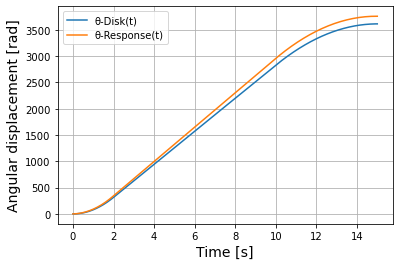

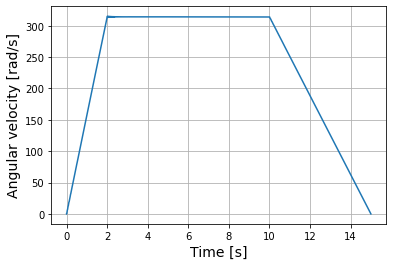

In [839]:
import numpy as np
from matplotlib import pyplot as plt

t0 = 0
tf = 15
tspan = np.linspace(t0, tf, tf*1000)


def xdotform(X, t):
    J = 10 

    #calculated values 
    k_t = 246740
    c_t = 62.83

    E = np.array([[0, 1],
                  [-k_t/J, -c_t/J]])
    
    # F(t)
    y = 0
    y_d = 0
    # Theta_d_dot(t):
    if t >= 0 and t <= 2:
        y = 25 * np.pi * t**2
        y_d = 50 * np.pi * t
    elif t > 2 and t <= 10:
        y = 100 * np.pi * t - 100 * np.pi
        y_d = 100 * np.pi
    elif t > 10 and t <= 15:
        y = -10 * np.pi * t**2 + 300 * np.pi * t - 1100 * np.pi
        y_d = (-20 * np.pi) * t + 300 * np.pi

    F = k_t*y + c_t*y_d
         
    Q = np.array([[0], [(1/J)*F]])
          
    xdot = np.squeeze(E.dot(np.array([X]).T) + Q)
     
    return xdot
     
X0 = np.array([0,0])


def rungekutta2(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(y[i] + f(y[i], t[i], *args) * h / 2., t[i] + h / 2., *args)
    return y

X = rungekutta2(xdotform, X0, tspan)

plt.plot(tspan, X[:, 0],label='θ-Disk(t)')
plt.plot(time,np.array(val)*(2*np.pi/60),label='θ-Response(t)')
plt.xlabel ("Time [s]", fontsize = 14)
plt.ylabel ("Angular displacement [rad]", fontsize = 14)
#plt.title ("Disk angular displacement - θr(t)", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

plt.plot(tspan, X[:, 1])
plt.xlabel ("Time [s]", fontsize = 14)
plt.ylabel ("Angular velocity [rad/s]", fontsize = 14)
#plt.title ("Disk angular velocity - θr(t)", fontsize = 16)
plt.grid()
plt.show()

In [472]:
from scipy import signal
from scipy.interpolate import interp1d

def getrpm(tacho, fs, triglevel, slope, ppr, newfs):
    #GETRPM    Get RPM as function of time from tacho signal
    #          [rpm,trpm] = getrpm(tacho,fs,triglevel,slope,ppr,newfs)
    #          rpm         RPM as funcion of time
    #          trpm        time base for RPM (seconds)
    #          tacho       tacho signal
    #          fs          sampling frequency for tacho in Hz
    #          triglevel   trig level for tacho pulses
    #          slope       +1 for trig on positive slope, 
    #                      -1 for trig on negative slope
    #          ppr         number of pulses per revolution for tacho
    #          newfs       new sampling frequency for tacho signal and time base 
    #
    #   NOTE! The trig function is very simple and basic which requires a
    #   clean tacho signal. In some cases, a filtered tacho may work better
    #   than the original one.

    #   A simple smoothing is performed on the rpm signal. A harder smoothing
    #   may in some circumstances be required.

    y = np.sign(tacho - triglevel)
    dy = np.diff(y)
    tt = maketime(dy, fs)
    yt = []
    for i in range(len(tt)):
        if slope > 0 and dy[i] > 0.5:
            yt.append(tt[i])
        #if slope < 0 and dy[i] < 0.5:
         #   yt.append(tt[i])
    dy = np.diff(tt)
    #dy(length(dy)+1) = dy(length(dy));
    rpm = (60/ppr)*np.ones(len(dy))
    b = [0.25, 0.5, 0.25]
    a = 1
    rpm = signal.filtfilt(a, b, rpm)
    N = max(tt) * newfs + 1
    trpm = np.linspace(0, np.max(tt), int(N))
    plt.plot(rpm)
    plt.show()
    #rpm = interp1d(yt, trpm)
    diffs = []
    for i in range(len(yt)-1):
        diffs.append(yt[i+1]-yt[i])
    rpms = 1-np.array(diffs)
    plt.figure(figsize=(14,5))
    plt.plot(rpms[0:2000])
    plt.show()
    plt.figure(figsize=(14,5))
    plt.plot(rpms)
    plt.show()

    return rpm,trpm
    
def maketime(x, fs):
    #MAKETIME   Make Time Vector
    #           t = maketime(x,fs)
    #           t  time vector in seconds with length corresponding to x
    #           x  data vector
    #           fs sampling frequency in Hz
    #    
    t = np.arange(0,len(x)/fs, 1/fs)
    return t

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\scipy\signal\waveforms.py:675: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


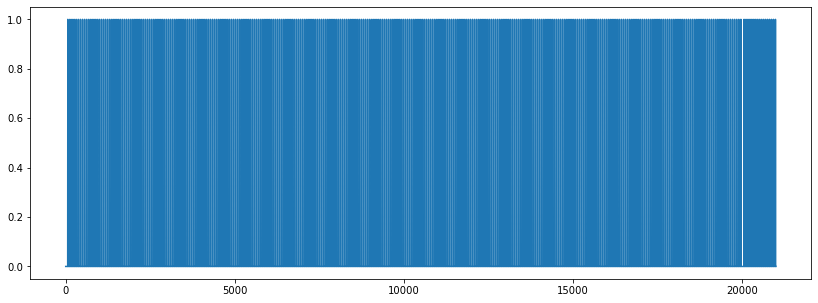

In [183]:
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

def func(x):
    y = np.zeros(len(x))
    for i,s in zip(x,range(len(x))):
        if i < 2:
            y[s] = 1500*i
        if i >= 2 and i < 10:
            y[s] = 3000
        if i >= 10:
            y[s] = 3000+600*(10-i)
    return y*(2*np.pi/60)

length = 1500
t = np.linspace(0,15,length)
v_rate = np.zeros(2*length*10000)
my_func = func(t)*1000/max(func(t))
for i,j in zip(my_func[1:-1],range(1500)):
    eppr = 4 #encorder pulses per revolution
    interval = signal.unit_impulse(20000, np.arange(0,20000,int(20000/(i*eppr))))[1:]
    v_rate[j*20000:(j+1)*20000] = np.append(0,interval)
        
counter = 0
for i in range(len(v_rate)):
    if v_rate[i] == 1:
        v_rate[i-1] = 1
        v_rate[i-2] = 1
        v_rate[i-3] = 1
#         if (counter%4) == 0:
#             v_rate[i-1] = 1
#             v_rate[i-2] = 1
#             v_rate[i-3] = 1
#             v_rate[i-4] = 1
#             v_rate[i-5] = 1
#             v_rate[i-6] = 1
        counter += 1
    
plt.figure(figsize=(14,5))
plt.plot(v_rate[300000:321000])
plt.show()

30000000


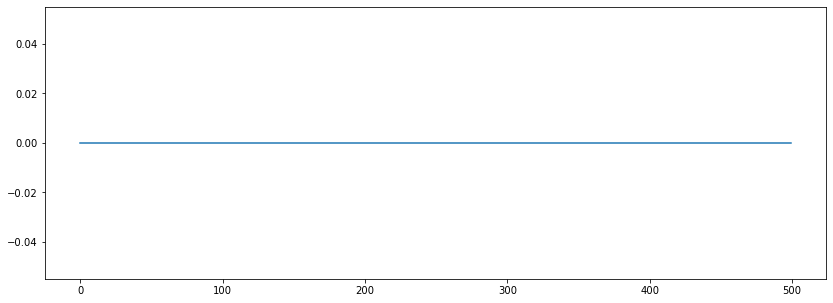

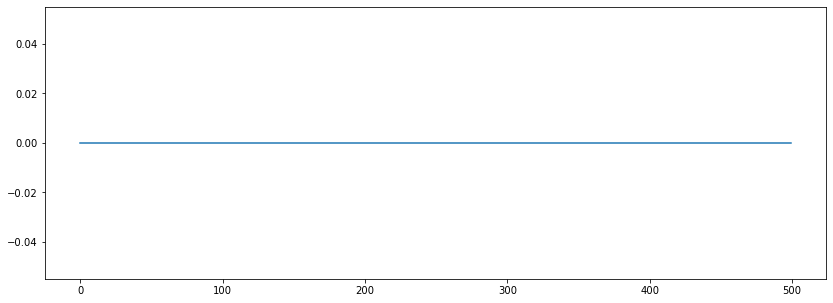

In [840]:
plt.figure(figsize=(14,5))
print(len(v_rate))
plt.plot(v_rate[15000000:15000500])
plt.show()
plt.figure(figsize=(14,5))
plt.plot(v_rate[400000:400500])
plt.show()

In [202]:
from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d

def maketime(x, fs):
    t = np.arange(0, len(x))/fs
    return t


#                                       pulses per revolution for tacho 
def getrpm(tacho, fs, triglevel, slope, ppr, newfs):
    y = np.sign(tacho - triglevel)
    dy = np.diff(y)
    tt = maketime(dy, fs)
    if slope > 0:
        yt = tt[np.where(dy > 0.8)]
    if slope < 0:
        yt = tt[np.where(dy < 0.8)]
    dy = np.diff(yt)
    dy = np.append(dy, dy[-1])
    rpm = 60/ppr*np.ones(dy.shape)/dy
    b, a = butter(8, 0.01)
    rpm = filtfilt(b, a, rpm)
    N = max(tt)*newfs/200 + 1
    trpm = np.linspace(0, max(tt), int(N))
    trpm = trpm.reshape(-1, 1)
    f = interp1d(yt, rpm, axis = 0, fill_value = "extrapolate")
    rpm = f(trpm)
    return rpm/10, trpm/200

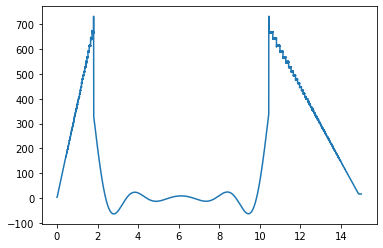

In [848]:
sig = getrpm(v_rate, 10000, 1, 1, 4, 10000)

plt.plot(sig[1],sig[0])
plt.show()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\scipy\signal\waveforms.py:675: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


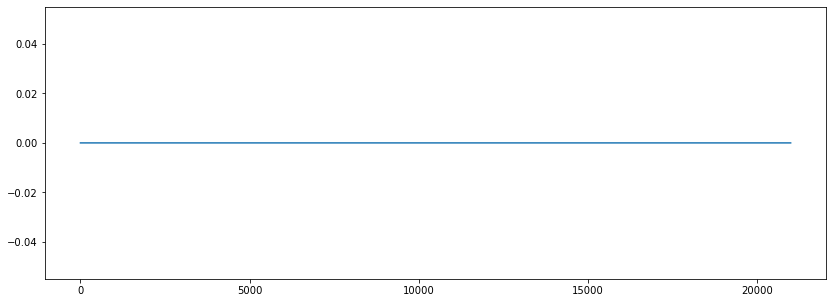

0.3333333333333333


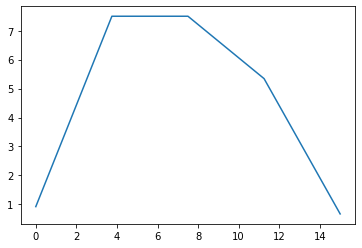

0.4


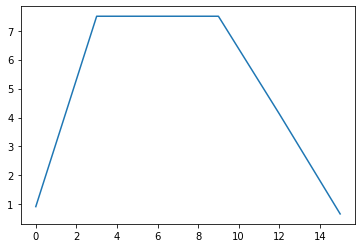

In [1128]:
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

def func(x):
    y = np.zeros(len(x))
    for i,s in zip(x,range(len(x))):
        if i < 2:
            y[s] = 1500*i
        if i >= 2 and i < 10:
            y[s] = 3000
        if i >= 10:
            y[s] = 3000+600*(10-i)
    return y*(2*np.pi/60)

length = 1500
t = np.linspace(0,15,length)
v_rate = np.zeros(2*length*10000)
my_func = func(t)*1000/max(func(t))
for i,j in zip(my_func[1:-1],range(1500)):
    eppr = 0.01 #encorder pulses per revolution
    interval = signal.unit_impulse(20000, np.arange(0,20000,int(20000/(i*eppr))))[1:]
    v_rate[j*20000:(j+1)*20000] = np.append(0,interval)
        
counter = 0
for i in range(len(v_rate)):
    if v_rate[i] == 1:
        for s in range(50):
            v_rate[i-s-1] = 1
#         if (counter%10) == 0:
#             for s in range(150):
#                 v_rate[i-s-1] = 1
#         if (counter%20) == 0:
#             v_rate[i-1] = 1
#             v_rate[i-2] = 1
        counter += 1.5
    
plt.figure(figsize=(14,5))
plt.plot(v_rate[300000:321000])
plt.show()

from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d

def maketime(x, fs):
    t = np.arange(0, len(x))/fs
    return t


#                                       pulses per revolution for tacho 
def getrpm(tacho, fs, triglevel, slope, ppr, newfs):
    y = np.sign(tacho - triglevel)
    dy = np.diff(y)
    tt = maketime(dy, fs)
    if slope > 0:
        yt = tt[np.where(dy > 0.8)]
    if slope < 0:
        yt = tt[np.where(dy < 0.8)]
    dy = np.diff(yt)
    dy = np.append(dy, dy[-1])
    rpm = 60/ppr*np.ones(dy.shape)/dy
    b, a = butter(8, 0.1)
    rpm = filtfilt(b, a, rpm)
    N = max(tt)*newfs/200 + 1
    trpm = np.linspace(0, max(tt), int(N))
    trpm = trpm.reshape(-1, 1)
    f = interp1d(yt, rpm, axis = 0, fill_value = "extrapolate")
    rpm = f(trpm)
    return rpm/10, trpm/200

for freq in [0.3,0.4]:
    sig = getrpm(v_rate, 10000, 1, 1, 4, freq)
    print(len(sig[0])/15)
    plt.plot(sig[1],sig[0])
    plt.show()

75000


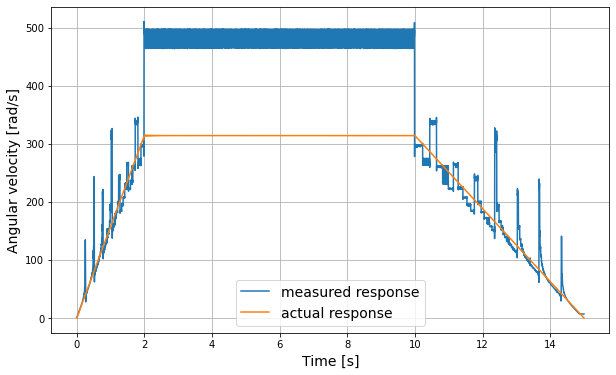

In [963]:
#                                       pulses per revolution for tacho 
def getrpm(tacho, fs, triglevel, slope, ppr, newfs):
    y = np.sign(tacho - triglevel)
    dy = np.diff(y)
    tt = maketime(dy, fs)
    if slope > 0:
        yt = tt[np.where(dy > 0.8)]
    if slope < 0:
        yt = tt[np.where(dy < 0.8)]
    dy = np.diff(yt)
    dy = np.append(dy, dy[-1])
    rpm = 60/ppr*np.ones(dy.shape)/dy
    b, a = butter(8, 0.01)
    rpm = filtfilt(b, a, rpm)
    N = max(tt)*newfs/200 + 1
    trpm = np.linspace(0, max(tt), int(N))
    trpm = trpm.reshape(-1, 1)
    f = interp1d(yt, rpm, axis = 0, fill_value = "extrapolate")
    rpm = f(trpm)
    return rpm/20000, trpm

plt.figure(figsize=(10,6))
for freq in [1000000]:
    sig = getrpm(v_rate, 2000000, 1, 1, 1, freq)
    print(len(sig[0]))
    plt.plot(sig[1],sig[0],label='measured response')
    plt.plot(tspan, X[:, 1],label='actual response')
    plt.xlabel ("Time [s]", size = 14)
    plt.ylabel ("Angular velocity [rad/s]",size = 14)
    #plt.title ("Disk angular velocity - θr(t)", fontsize = 16)
    plt.grid()
    plt.legend(fontsize=14)
    plt.show()

30000000


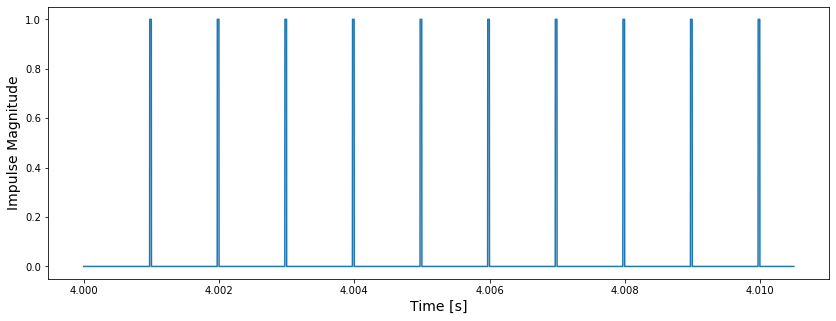

In [1130]:
plt.figure(figsize=(14,5))
print(len(v_rate))
start = 8000000
end = 8021000
testingPart = v_rate[start:end]
plt.plot(np.linspace(start/2000000,end/2000000,end-start),testingPart)
plt.xlabel('Time [s]',size=14)
plt.ylabel('Impulse Magnitude',size=14)
plt.show()

30000000


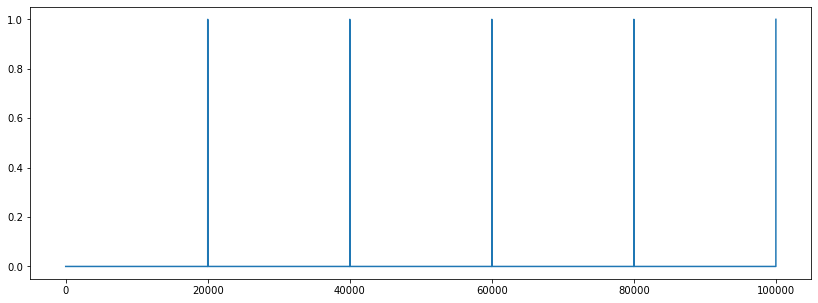

In [841]:
plt.figure(figsize=(14,5))
print(len(v_rate))
plt.plot(v_rate[10000000:10100000])
plt.show()


In [1119]:
print(len(v_rate[4000000:20000000])/8)

2000000.0


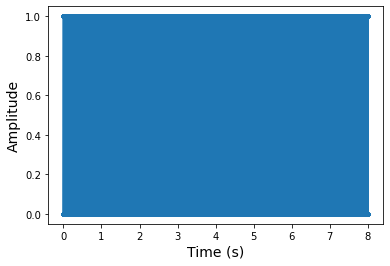

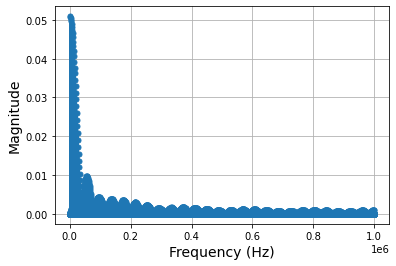

In [1132]:
# Number of sample points
fs = 2000000 # Minimum of 2 Hz since Nyquist is 2Hz
time = 8 # Minimum of 2s
N = time*fs 
# sample spacing
T = 1.0 / fs
x = np.linspace(0,8,int(len(v_rate)*8/15))
y = v_rate[4000000:20000000]

# The sampling frequency 
plt.plot(x,y,'.-')
plt.xlabel('Time (s)',size=14)
plt.ylabel('Amplitude',size=14)
plt.show()

yf = fft(y,N)
xf = fftfreq(N, T)[:N//2]
y = 2.0/N * np.abs(yf[0:N//2])

plt.plot(xf[1:],y[1:],'.-', markersize=10)

plt.grid()
plt.xlabel('Frequency (Hz)',size=14)
plt.ylabel('Magnitude',size=14)
plt.show()

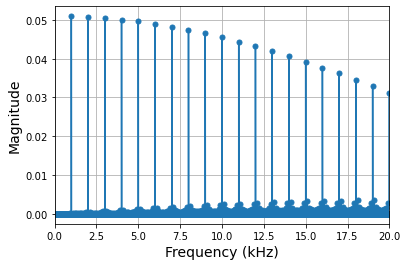

In [1139]:
plt.plot(xf[1:]/1000,y[1:],'.-', markersize=10)

plt.grid()
plt.xlabel('Frequency (kHz)',size=14)
plt.ylabel('Magnitude',size=14)
plt.xlim(0,20)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


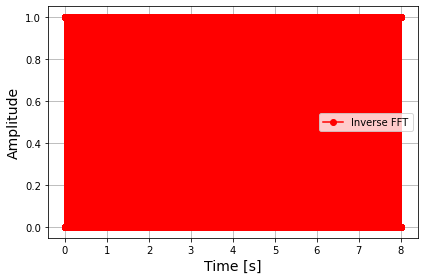

In [1136]:
s = ifft(yf)
t = np.linspace(0,time,len(yf))
plt.plot(t, s.real, 'ro-',label='Inverse FFT')
plt.legend()
plt.grid()
plt.ylabel('Amplitude',size=14)
plt.xlabel('Time [s]',size=14)
plt.tight_layout()
plt.show()

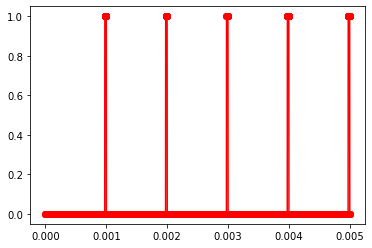

In [1138]:
plt.plot(t[:10000], s.real[:10000], 'ro-',label='Inverse FFT')
plt.show()